# Homework-4

In [2]:
!pip install instaloader
from bs4 import BeautifulSoup
import instaloader
from pprint import pprint
import tweepy
from pprint import pprint 
from tweepy import Stream
from tweepy.streaming import StreamListener
import csv
import numpy as np
import operator
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
def downloadDatasetTwitter(username)
  csvFile = open('tweets_test.csv', 'w')
  csvWriter = csv.writer(csvFile)
  for tweet in tweepy.Cursor(api.user_timeline, id=username,include_entities=True,tweet_mode = 'extended').items(3200):
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8'),tweet.user.id,tweet.user.followers_count,tweet.place])
  # pprint(x)

## Part-1

In [3]:
#Consumer Key (API Key), Consumer Secret (API Secret)
auth = tweepy.OAuthHandler('ZKkGRRKUBGY9NbDtuzZk6lVy6','Zx3v5FaMqXM907KilyTZdGWFiVlkuyVMi636vRQynHvKO3EdBR')
# Access Token, Access Token Secret
auth.set_access_token('2878516730-7GkdTlpexHuZL0fg3vlCBcJpeUWnAuSqTKTew6z','kwEWM9ixk4ylcTXCIYnV9kc9hFmQwvsyprMJtSXAEA0aY')

api = tweepy.API(auth)
if (not api):
    print("Authentication failed :(")
else:
    print("Authentication successfull!!! :D")

Authentication successfull!!! :D


In [5]:
usernameBJP="BJP4India"
usernameINC="INCIndia"
tweetsBJP=[]
tweetsINC=[]
retweetCount=[]
likeCount=[]

retweetCountINC=[]
likeCountINC=[]

for tweet in tweepy.Cursor(api.user_timeline, id=usernameBJP,include_entities=True,tweet_mode = 'extended').items(3200):
  tweetsBJP.append(tweet)
  retweetCount.append(tweet.retweet_count)
  likeCount.append(tweet.favorite_count)
  
for tweet in tweepy.Cursor(api.user_timeline, id=usernameINC,include_entities=True,tweet_mode = 'extended').items(3200):
  tweetsINC.append(tweet)
  retweetCountINC.append(tweet.retweet_count)
  likeCountINC.append(tweet.favorite_count)
  
print("tweetsBJP",len(tweetsBJP))
print("INCIndia",len(tweetsINC))

  


tweetsBJP 3200
INCIndia 3200


In [6]:
t=tweetsINC[1]
print("ID: ",id,"URL: ","https://twitter.com/statuses/"+str(t.id))

for media in t.entities.get("media",[{}]):
  
    #checks if there is any media-entity
    if media.get("type",None) == "photo":
        # checks if the entity is of the type "photo"
        pprint(media)
        # save to file etc.
    else:
      print("no image")

for media in t.entities.get("urls",[{}]):
  
    #checks if there is any media-entity
    if media.get("type",None) != "None":
        # checks if the entity is of the type "photo"
        print("video ",media["expanded_url"])
        # save to file etc.
    else:
      print("no image")


ID:  <built-in function id> URL:  https://twitter.com/statuses/1116581855623467016
no image


## Part-1: 1-a

In [36]:
def mostLiked():
  print("Most liked tweet of BJP")
  index=np.argmax(likeCount)
  id=tweetsBJP[index].id
  print("ID: ",id,"Text: ",tweetsBJP[index].full_text,"Likes: ",likeCount[index],"URL: ","https://twitter.com/statuses/"+str(id))
mostLiked()

Most liked tweet of BJP
ID:  1110886268408233984 Text:  Congress led UPA
Surgical Strike : Don't do it
Air Strike: Don't do it
A-SAT Missile: Don't do it

Modi Sarkar
Surgical Strike: Go For It
Air Strike: Go For It
A-SAT Missile: Go For It

Modi Hai To Mumkin Hai. #MissionShakti Likes:  43519 URL:  https://twitter.com/statuses/1110886268408233984


## Part-1: 1-b

In [37]:
def mostRetweeted():
  print("Most liked tweet of BJP")
  index=np.argmax(retweetCount)
  id=tweetsBJP[index].id
  print("ID: ",id,"Text: ",tweetsBJP[index].full_text,"Retweets: ",retweetCount[index],"URL: ","https://twitter.com/statuses/"+str(id))
mostRetweeted()

Most liked tweet of BJP
ID:  1101524057353342981 Text:  RT @narendramodi: Welcome Home Wing Commander Abhinandan!

The nation is proud of your exemplary courage.

Our armed forces are an inspirat… Retweets:  66206 URL:  https://twitter.com/statuses/1101524057353342981


## Part-1: 1-c

In [38]:
def popularTweetsBJP():
  #giving more weightage to retweet than like
  #popularity = 2*retweet_count+likes
  popularity={}
  idVstweet={}
  for retweet,like,tweet in zip(retweetCount,likeCount,tweetsBJP):
    popularity[tweet.id]=2*retweet+like
    idVstweet[tweet.id]=tweet
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pTweetsIdsVsPop=sorted_d[:5]
  print("Popular tweets BJP: ")
  print("====================================")
  for ptweet in pTweetsIdsVsPop:
    print("ID: ",ptweet[0])
    print("Text: ",idVstweet[ptweet[0]].full_text)
    print("Likes: ",idVstweet[ptweet[0]].favorite_count)
    print("Retweets: ",idVstweet[ptweet[0]].retweet_count)
    print("URL:","https://twitter.com/statuses/"+str(ptweet[0]))
    print("====================================")
  
popularTweetsBJP()

Popular tweets BJP: 
ID:  1101524057353342981
Text:  RT @narendramodi: Welcome Home Wing Commander Abhinandan!

The nation is proud of your exemplary courage.

Our armed forces are an inspirat…
Likes:  0
Retweets:  66206
URL: https://twitter.com/statuses/1101524057353342981
ID:  1106767552351559680
Text:  RT @narendramodi: Your Chowkidar is standing firm &amp; serving the nation.

But, I am not alone.

Everyone who is fighting corruption, dirt, s…
Likes:  0
Retweets:  56313
URL: https://twitter.com/statuses/1106767552351559680
ID:  1114495595421376512
Text:  आज तक ने प्रधानमंत्री श्री नरेन्द्र मोदी के भाषण पर दिखाई गलत खबर।

आखिर क्यों? https://t.co/U2KZlMFf7b
Likes:  37936
Retweets:  18176
URL: https://twitter.com/statuses/1114495595421376512
ID:  1110886268408233984
Text:  Congress led UPA
Surgical Strike : Don't do it
Air Strike: Don't do it
A-SAT Missile: Don't do it

Modi Sarkar
Surgical Strike: Go For It
Air Strike: Go For It
A-SAT Missile: Go For It

Modi Hai To Mumkin Hai. #Mis

## Part-1: 1-d

In [10]:
def mostFreqHashTagsBJP():
  print("Most frequent hashtags used by BJP's official handle")
  allHashTags=[]
  for tweet in tweetsBJP:
    for hashtag in tweet.entities["hashtags"]:
      allHashTags.append(hashtag["text"])
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("====================================")
  print("%20s | %4s"%("Hashtag","Frequency"))
  print("====================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%20s | %4d"%(hashtag,count))
  
mostFreqHashTagsBJP()

Most frequent hashtags used by BJP's official handle
             Hashtag | Frequency
  BJPSankalpPatr2019 |  139
    IsBaarNaMoPhirSe |  134
      IsBaarPhirModi |  123
       IndiaWithNaMo |  112
      DeshKeLiyeModi |  102


## Part-1: 2-b

Congress, President most frequently in INC's popular tweets 
Congress President, Rahul Gandhi, India, Public, People, Rafale, NoMo, BJP,Modi, Govt


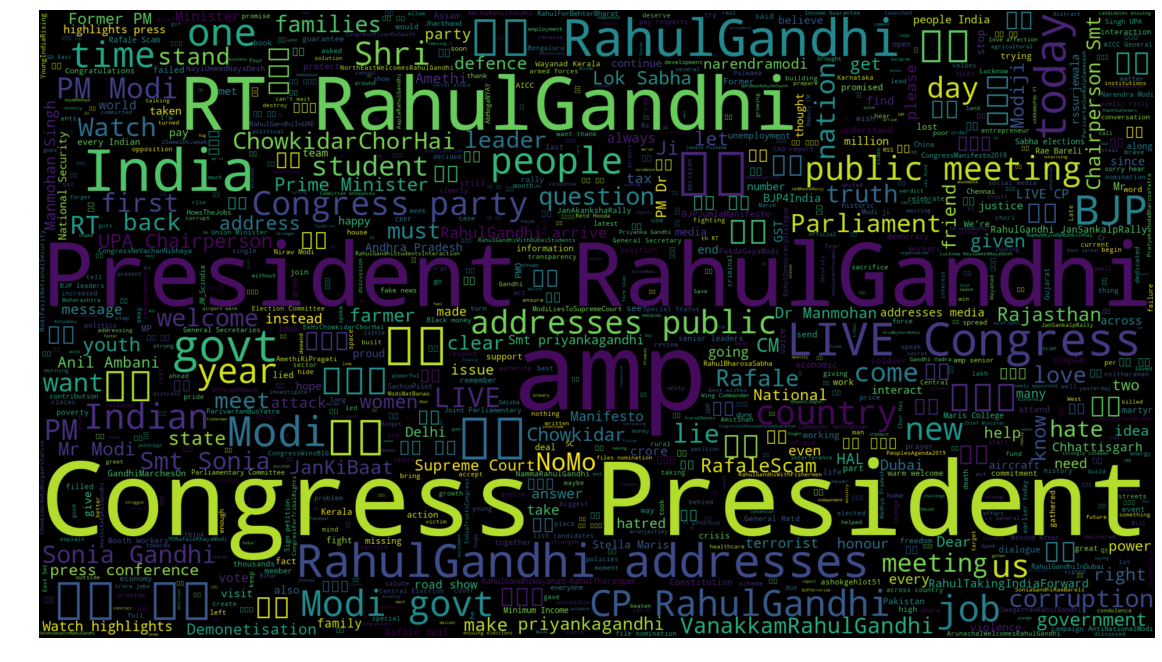

In [12]:
def popularTweetsINC():
  #giving more weightage to retweet than like
  #popularity = 2*retweet_count+likes
  popularity={}
  idVstweet={}
  for retweet,like,tweet in zip(retweetCountINC,likeCountINC,tweetsINC):
    popularity[tweet.id]=2*retweet+like
    idVstweet[tweet.id]=tweet
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pTweetsIdsVsPop=sorted_d[:1000]
  para=""
  for ptweet in pTweetsIdsVsPop:
      para+=" "+idVstweet[ptweet[0]].full_text
    
  mask = np.array(Image.open("rab.jpg"))
  words = set(nltk.corpus.words.words())
#   para= " ".join(w for w in nltk.wordpunct_tokenize(para) if w.lower() in words or not w.isalpha())
#   para= " ".join(w for w in nltk.wordpunct_tokenize(para) if w.lower() is not w.isalpha())
  stopWords=['i','like','say','https','co', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","claim","claimed","however","Responsibility"]
  
  wordcloudSummary = WordCloud(mask=mask,max_words=1000,stopwords=stopWords).generate(para)   
  plt.figure(3,figsize=(20,20))
  plt.imshow(wordcloudSummary, interpolation="bilinear") 
  plt.axis("off") 
  plt.margins(x=0, y=0) 
  print("===========================================")
  print("Most frequent words in INC's popular tweets ")
  print("===========================================")
  print("Congress President, Rahul Gandhi, India, Public, People, Rafale, NoMo, BJP,Modi, Govt")
  plt.show()
  wordcloudSummary.to_file("popularTweetCloud.png")

  
popularTweetsINC()

## Part-1: 2-c

In [0]:
def mostFreqHashTagsINC():
  print("Most frequent hashtags used by INC's official handle")
  allHashTags=[]
  for tweet in tweetsINC:
    for hashtag in tweet.entities["hashtags"]:
      allHashTags.append(hashtag["text"])
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
  
mostFreqHashTagsINC()

Most frequent hashtags used by INC's official handle
                                 Hashtag | Frequency
                        NammaRahulGandhi |   56
                              RafaleScam |   50
          TelanganasProgressWithCongress |   45
                        YoungIndiaRising |   45
                     VanakkamRahulGandhi |   41


## Part-2:

In [0]:
L = instaloader.Instaloader()

In [16]:
usernameBJP="bjp4india"

BJPpostsGenerator = instaloader.Profile.from_username(L.context, usernameBJP).get_posts()
BJPPosts=[]
BJPPostsLikes=[]
BJPPostsIsVideo=[]
BJPPostsComments=[]
BJPPostsHashTags=[]
count=0
for post in BJPpostsGenerator:
  if count==1000:
    break
  BJPPostsLikes.append(post.likes)
  BJPPostsComments.append(post.comments)
  BJPPostsHashTags+=post.caption_hashtags
  BJPPosts.append(post)
  BJPPostsIsVideo.append(post.is_video)
  count+=1
  print(count,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [17]:
usernameINC="incindia"
INCpostsGenerator = instaloader.Profile.from_username(L.context, usernameINC).get_posts()
INCPosts=[]
INCPostsLikes=[]
INCPostsComments=[]
INCPostsHashTags=[]
count=0
for post in INCpostsGenerator:
  if count==500:
    break
  INCPostsLikes.append(post.likes)
  INCPostsComments.append(post.comments)
  INCPostsHashTags+=post.caption_hashtags
  INCPosts.append(post)
  count+=1
  print(count,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

## Part-2: 1-a

In [39]:
def INC_Insta_MostLikesAndComments():
  indexMostLiked=np.argmax(INCPostsLikes)
  indexMostComment=np.argmax(INCPostsComments)
  mostLikedPost=INCPosts[indexMostLiked]
  mostCommentedPost=INCPosts[indexMostComment]
  print("===================================")
  print("Indian National Congress's instagram  Post with most number of Likes")
  print("===================================")
  print("Post ID: ",mostLikedPost.shortcode,"\n")
  print("Post URL: ","https://www.instagram.com/p/"+mostLikedPost.shortcode,"\n")
  print("Post Text: ",mostLikedPost.caption,"\n")
  print("Post Likes: ",mostLikedPost.likes,"\n")
  print("Post Comments: ",mostLikedPost.comments,"\n")

  print("======================================================================")
  print("Indian National Congress's instagram  Post with most number of Comments")
  print("===================================")
  print("Post ID: ",mostCommentedPost.shortcode,"\n")
  print("Post URL: ","https://www.instagram.com/p/"+mostCommentedPost.shortcode,"\n")
  print("Post Text: ",mostCommentedPost.caption,"\n")
  print("Post Comments: ",mostCommentedPost.comments,"\n")
  print("Post Likes: ",mostCommentedPost.likes,"\n")
INC_Insta_MostLikesAndComments()

Indian National Congress's instagram  Post with most number of Likes
Post ID:  Bs-IxK3FTIx 

Post URL:  https://www.instagram.com/p/Bs-IxK3FTIx 

Post Text:  Congratulations to Priyanka Gandhi Vadra on becoming the #AICC General Secretary of #UP East. We’re fired up and ready to go! .
.
#PriyankaGandhi #PGV #Politics #IndianPolitics #Congress #Democracy #WomenLeaders 

Post Likes:  47568 

Post Comments:  831 

Indian National Congress's instagram  Post with most number of Comments
Post ID:  BtoT5MoFAL3 

Post URL:  https://www.instagram.com/p/BtoT5MoFAL3 

Post Text:  The most talked about video on social media! 

Post Comments:  3907 

Post Likes:  19040 



## Part-2: 1-b

In [19]:
def popularPostsINC():
  #giving more weightage to like than comment
  #popularity = 2*likes+comment
  popularity={}
  idVsPost={}
  for like,comment,post in zip(INCPostsLikes,INCPostsComments,INCPosts):
    popularity[post.shortcode]=2*like+comment
    idVsPost[post.shortcode]=post
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pPostIdsVsPop=sorted_d[:5]
  print("5 most Popular Posts Indian National Congress: ")
  print("====================================")
  for pPost in pPostIdsVsPop:
    print("Post ID: ",idVsPost[pPost[0]].shortcode,"\n")
    print("Post URL: ","https://www.instagram.com/p/"+idVsPost[pPost[0]].shortcode,"\n")
    print("Post Text: ",idVsPost[pPost[0]].caption,"\n")
    print("Post Comments: ",idVsPost[pPost[0]].comments,"\n")
    print("Post Likes: ",idVsPost[pPost[0]].likes,"\n")
    print("====================================")
  
popularPostsINC()

5 most Popular Posts Indian National Congress: 
Post ID:  Bs-IxK3FTIx 

Post URL:  https://www.instagram.com/p/Bs-IxK3FTIx 

Post Text:  Congratulations to Priyanka Gandhi Vadra on becoming the #AICC General Secretary of #UP East. We’re fired up and ready to go! .
.
#PriyankaGandhi #PGV #Politics #IndianPolitics #Congress #Democracy #WomenLeaders 

Post Comments:  831 

Post Likes:  47568 

Post ID:  BrmutwOF63Y 

Post URL:  https://www.instagram.com/p/BrmutwOF63Y 

Post Text:  📸: The grace and charm of #SoniaGandhi captured through the lens of #RajivGandhi!
.
.
#TBT #ThrowbackThursday 

Post Comments:  777 

Post Likes:  46398 

Post ID:  Bvgd6WZlmsz 

Post URL:  https://www.instagram.com/p/Bvgd6WZlmsz 

Post Text:  Congress President @rahulgandhi welcomes Smt. @urmilamatondkarofficial to the Congress Party.
.
.
#Congratulations #IndianNationalCongress 

Post Comments:  599 

Post Likes:  41730 

Post ID:  BrQDi4VFI2- 

Post URL:  https://www.instagram.com/p/BrQDi4VFI2- 

Post Text:  

## Part-2: 1-c

In [40]:
def frequent_HashTags_InstaINC():
  hashTagsCount=np.unique(INCPostsHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
frequent_HashTags_InstaINC()

                                 Hashtag | Frequency
                                congress |   78
                                   india |   41
                                    nomo |   30
                             rahulgandhi |   24
                                     bjp |   23


## Part-2: 2-a

364 posts consisting of videos out of 1000 posts of BJP's official handle


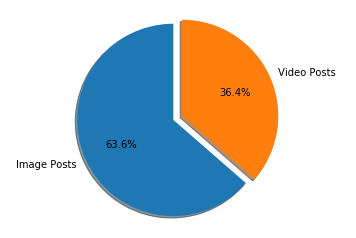

In [41]:
def videoPostsBJP():
  postTypeVideo=np.unique(BJPPostsIsVideo,return_counts=True)
  if postTypeVideo[0][0]==True:
    labels="Video Posts","Image Posts"
    print("%d posts consisting of videos out of 1000 posts of BJP's official handle"%(postTypeVideo[1][0]))
  else:
    labels="Image Posts","Video Posts"
    print("%d posts consisting of videos out of 1000 posts of BJP's official handle"%(postTypeVideo[1][1]))
  
  sizes = postTypeVideo[1]
  explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

videoPostsBJP()

## Part-2: 2-b

words occur most frequently in BJP's instagram posts
PM, NarendraModi, Prime Minister, India, Temple, New Delhi, Election, Gujarat,National President, People, MAinBhiChowkidar 


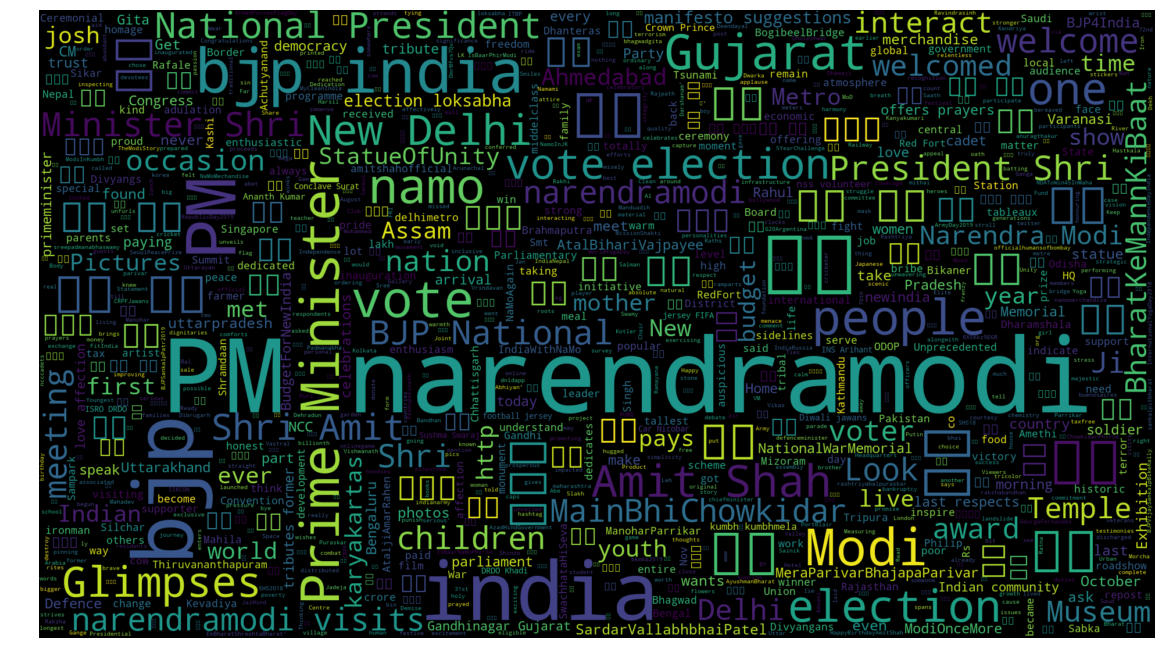

In [42]:
def popularPostsBJP():
  #giving more weightage to like than comment
  #popularity = 2*likes+comment
  popularity={}
  idVsPost={}
  for like,comment,post in zip(BJPPostsLikes,BJPPostsComments,BJPPosts):
    popularity[post.shortcode]=2*like+comment
    idVsPost[post.shortcode]=post
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pPostIdsVsPop=sorted_d[:200]
  para=""
  for pPost in pPostIdsVsPop:
    para+=" "+idVsPost[pPost[0]].caption
    
  mask = np.array(Image.open("rab.jpg"))
  words = set(nltk.corpus.words.words())
#   para= " ".join(w for w in nltk.wordpunct_tokenize(para) if w.lower() is not w.isalpha())
  stopWords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","claim","claimed","however","Responsibility"]
  
  wordcloudSummary = WordCloud(mask=mask,max_words=1000,stopwords=stopWords).generate(para)   
  plt.figure(3,figsize=(20,20))
  plt.imshow(wordcloudSummary, interpolation="bilinear") 
  plt.axis("off") 
  plt.margins(x=0, y=0) 
  print("===========================================")
  print("words occur most frequently in BJP's instagram posts")
  print("===========================================")
  print("PM, NarendraModi, Prime Minister, India, Temple, New Delhi, Election, Gujarat,National President, People, MAinBhiChowkidar ")
  plt.show()
  wordcloudSummary.to_file("popularInstaPostCloud.png")

  
popularPostsBJP()

## Part-2: 2-c

In [43]:
def frequent_HashTags_InstaBJP():
  hashTagsCount=np.unique(BJPPostsHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
frequent_HashTags_InstaBJP()

                                 Hashtag | Frequency
                                     bjp |   96
                                   india |   68
                                election |   39
                                    vote |   34
                      bharatkemannkibaat |   16


In [34]:
USER="thatsanuj"
L.interactive_login(USER)


Enter Instagram password for thatsanuj: ··········


ConnectionException: ignored

In [33]:
exploreFeedsGenerator = L.get_explore_posts(L.context)

LoginRequiredException: ignored